In [124]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import itertools

import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [125]:
NORMAL = 0
FIGHTING = 1
FLYING = 2
POISON = 3
GROUND = 4
ROCK = 5
BUG = 6
GHOST = 7
STEEL = 8
FIRE = 9
WATER = 10
GRASS = 11
ELECTRIC = 12
PSYCHIC = 13
ICE = 14
DRAGON = 15
DARK = 16
FAIRY = 17

#formato: lista[tipo atacando][tipo defendendo]
matchup = [
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [2.0, 1.0, 0.5, 0.5, 1.0, 2.0, 0.5, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5],
    [1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.5, 1.0, 2.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.5],
    [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 2.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5, 0.5, 2.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 0.5, 0.5, 2.0, 2.0, 0.5, 1.0, 0.5, 0.5, 2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0],
    [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5],
    [1.0, 2.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0]
]

In [126]:
df = pd.read_csv('pokemon.csv')
df.head()

del df['against_bug']
del df['against_dark']
del df['against_dragon']
del df['against_electric']
del df['against_fairy']
del df['against_fight']
del df['against_fire']
del df['against_flying']
del df['against_ghost']
del df['against_grass']
del df['against_ground']
del df['against_ice']
del df['against_normal']
del df['against_poison']
del df['against_psychic']
del df['against_rock']
del df['against_steel']
del df['against_water']

del df['base_egg_steps']
del df['base_happiness']
del df['capture_rate']
del df['classfication']
del df['experience_growth']
del df['height_m']
del df['japanese_name']
del df['percentage_male']
del df['weight_kg']
del df['generation']
del df['is_legendary']

#del df['base_total']
del df['abilities'] #interessante se sobrar tempo


#substituir NaN por string vazia
df['type2']= df['type2'].fillna(value='')
df.head()

,attack,base_total,defense,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2
0,49,318,49,45,Bulbasaur,1,65,65,45,grass,poison
1,62,405,63,60,Ivysaur,2,80,80,60,grass,poison
2,100,625,123,80,Venusaur,3,122,120,80,grass,poison
3,52,309,43,39,Charmander,4,60,50,65,fire,
4,64,405,58,58,Charmeleon,5,80,65,80,fire,


In [127]:
## Campos: Attack - Defense - Sp_Attack - Sp_Defense - Speed - HP - Name - Stat_Total - IV_Attack - IV_Defense - IV_Sp_Attack - IV_Sp_Defense - IV_Speed - IV_HP

grass_sample= pd.DataFrame(columns=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'iv_attack', 'iv_defense', 'iv_sp_attack', 'iv_sp_defense', 'iv_speed', 'iv_hp', 'stat_total', 'name', ])
fire_sample= pd.DataFrame(columns=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'iv_attack', 'iv_defense', 'iv_sp_attack', 'iv_sp_defense', 'iv_speed', 'iv_hp', 'stat_total', 'name', ])
water_sample= pd.DataFrame(columns=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'iv_attack', 'iv_defense', 'iv_sp_attack', 'iv_sp_defense', 'iv_speed', 'iv_hp', 'stat_total', 'name', ])

total_samples= pd.DataFrame(columns=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'iv_attack', 'iv_defense', 'iv_sp_attack', 'iv_sp_defense', 'iv_speed', 'iv_hp', 'stat_total', 'name', ])

grass_types=df[ (df['type1'] == 'grass') | (df['type2'] == 'grass')]
fire_types=df[ (df['type1'] == 'fire') | (df['type2'] == 'fire')]
water_types=df[ (df['type1'] == 'water') | (df['type2'] == 'water')]


###
#Desconsiderando EVs
#por enquanto podemos assumir apenas nature neutra
#HP: (2*base+IV)*level/100+level+10
#Other: ((2*base+IV)*level/100 +5)*nature
###


#Assumindo sempre um mesmo level para os pokémons
level=50

#Por enquanto calculando somente para nature neutra
nature=1

#primeiro: gerar IVs linearmente espaçados
tmp= itertools.product( range(2), repeat=6 )
iv_values=[]
for element in tmp:
    element=list(element)
    element= [i *31 for i in element] #calculando para os valores 0 e 31 de IV
    iv_values.append(element)

#Por indicação do professor, desconsiderando a variação no IV
#iv_values=[ [15, 15, 15, 15, 15, 15] ]

i=0
for index, pokemon in grass_types.iterrows():
    for combination in iv_values:
        
        #primeiros 6 índices são o cálculo dos stats reais de um indíviduo dentro de uma mesma espécie de pokémon
        tmp=[0, 0, 0, 0, 0, 0]
        tmp[0]= ((2*pokemon['attack']+combination[0])*level//100 +5)*nature
        tmp[1]= ((2*pokemon['defense']+combination[1])*level//100 +5)*nature
        tmp[2]= ((2*pokemon['sp_attack']+combination[2])*level//100 +5)*nature
        tmp[3]= ((2*pokemon['sp_defense']+combination[3])*level//100 +5)*nature
        tmp[4]= ((2*pokemon['speed']+combination[4])*level//100 +5)*nature
        
        tmp[5]= (2*pokemon['hp']+combination[5])*level//100+level+10 #cálculo de hp é diferente dos outros stats
        
        stat_total= sum(tmp)
        
        #concatenamos à lista os 6 valores de iv utilizados
        tmp= tmp+combination
        
        #concatemos a soma dos stats
        tmp.append(stat_total)
        
        #no final colocar o nome do pokémon
        tmp.append(pokemon['name'])
        
        #por fim jogar a lista temporária no nosso novo dataframe
        grass_sample.loc[len(grass_sample)]= tmp
    
    i+=1
    #if( i%20 == 0 ):
        #print("Progresso: calculado variantes para "+str(i)+" pokémons.")
#print("Progresso: calculado variantes para tipo grass")

i=0
for index, pokemon in fire_types.iterrows():
    for combination in iv_values:
        
        #primeiros 6 índices são o cálculo dos stats reais de um indíviduo dentro de uma mesma espécie de pokémon
        tmp=[0, 0, 0, 0, 0, 0]
        tmp[0]= ((2*pokemon['attack']+combination[0])*level//100 +5)*nature
        tmp[1]= ((2*pokemon['defense']+combination[1])*level//100 +5)*nature
        tmp[2]= ((2*pokemon['sp_attack']+combination[2])*level//100 +5)*nature
        tmp[3]= ((2*pokemon['sp_defense']+combination[3])*level//100 +5)*nature
        tmp[4]= ((2*pokemon['speed']+combination[4])*level//100 +5)*nature
        
        tmp[5]= (2*pokemon['hp']+combination[5])*level//100+level+10 #cálculo de hp é diferente dos outros stats
        
        stat_total= sum(tmp)
        
        #concatenamos à lista os 6 valores de iv utilizados
        tmp= tmp+combination
        
        #concatemos a soma dos stats
        tmp.append(stat_total)
        
        #no final colocar o nome do pokémon
        tmp.append(pokemon['name'])
        
        #por fim jogar a lista temporária no nosso novo dataframe
        fire_sample.loc[len(fire_sample)]= tmp
        
    i+=1
    #if( i%20 == 0 ):
        #print("Progresso: calculado variantes para "+str(i)+" pokémons.")
#print("Progresso: calculado variantes para tipo fire")

i=0
for index, pokemon in water_types.iterrows():
    for combination in iv_values:
        
        #primeiros 6 índices são o cálculo dos stats reais de um indíviduo dentro de uma mesma espécie de pokémon
        tmp=[0, 0, 0, 0, 0, 0]
        tmp[0]= ((2*pokemon['attack']+combination[0])*level//100 +5)*nature
        tmp[1]= ((2*pokemon['defense']+combination[1])*level//100 +5)*nature
        tmp[2]= ((2*pokemon['sp_attack']+combination[2])*level//100 +5)*nature
        tmp[3]= ((2*pokemon['sp_defense']+combination[3])*level//100 +5)*nature
        tmp[4]= ((2*pokemon['speed']+combination[4])*level//100 +5)*nature
        
        tmp[5]= (2*pokemon['hp']+combination[5])*level//100+level+10 #cálculo de hp é diferente dos outros stats
        
        stat_total= sum(tmp)
        
        #concatenamos à lista os 6 valores de iv utilizados
        tmp= tmp+combination
        
        #concatemos a soma dos stats
        tmp.append(stat_total)
        
        #no final colocar o nome do pokémon
        tmp.append(pokemon['name'])
        
        #por fim jogar a lista temporária no nosso novo dataframe
        water_sample.loc[len(water_sample)]= tmp
        
    i+=1
    #if( i%20 == 0 ):
        #print("Progresso: calculado variantes para "+str(i)+" pokémons.")
#print("Progresso: calculado variantes para tipo water")

#i=0
#for index, pokemon in df.iterrows():
#    for combination in iv_values:
#        
#        #primeiros 6 índices são o cálculo dos stats reais de um indíviduo dentro de uma mesma espécie de pokémon
#        tmp=[0, 0, 0, 0, 0, 0]
#        tmp[0]= ((2*pokemon['attack']+combination[0])*level//100 +5)*nature
#        tmp[1]= ((2*pokemon['defense']+combination[1])*level//100 +5)*nature
#        tmp[2]= ((2*pokemon['sp_attack']+combination[2])*level//100 +5)*nature
#        tmp[3]= ((2*pokemon['sp_defense']+combination[3])*level//100 +5)*nature
#        tmp[4]= ((2*pokemon['speed']+combination[4])*level//100 +5)*nature
#        
#        tmp[5]= (2*pokemon['hp']+combination[5])*level//100+level+10 #cálculo de hp é diferente dos outros stats
#        
#        stat_total= sum(tmp)
#        
#        #concatenamos à lista os 6 valores de iv utilizados
#        tmp= tmp+combination
#        
#        #concatemos a soma dos stats
#        tmp.append(stat_total)
#        
#        #no final colocar o nome do pokémon
#        tmp.append(pokemon['name'])
#        
#        #por fim jogar a lista temporária no nosso novo dataframe
#        total_samples.loc[len(total_samples)]= tmp
#        
#    i+=1
    #if( i%20 == 0 ):
        #print("Progresso: calculado variantes para "+str(i)+" pokémons.")
#print("Progresso: calculado variantes para todos os tipos")
        

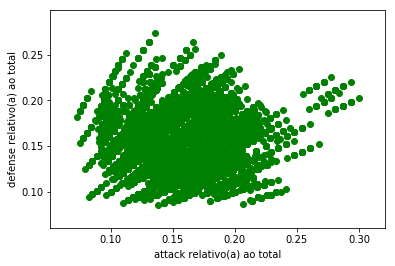

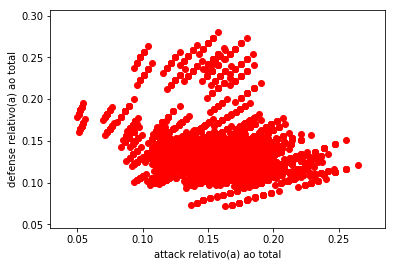

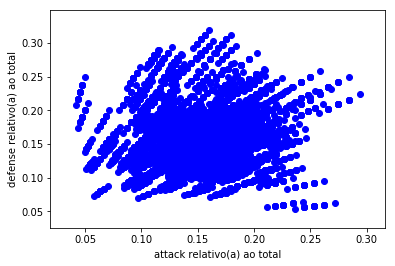

In [128]:
var_interesse_1= 'attack'
var_interesse_2= 'defense'

#matplotlib.rcParams.update({'font.size': 44})

#plt.figure(figsize=(64,36))
plt.scatter(grass_sample[var_interesse_1]/grass_sample['stat_total'], grass_sample[var_interesse_2]/grass_sample['stat_total'], c='g')
plt.xlabel(var_interesse_1+' relativo(a) ao total')
plt.ylabel(var_interesse_2+' relativo(a) ao total')
print('\n')
plt.show()

#plt.figure(figsize=(64,36))
plt.scatter(fire_sample[var_interesse_1]/fire_sample['stat_total'], fire_sample[var_interesse_2]/fire_sample['stat_total'], c='r')
plt.xlabel(var_interesse_1+' relativo(a) ao total')
plt.ylabel(var_interesse_2+' relativo(a) ao total')
print('\n')
plt.show()

#plt.figure(figsize=(64,36))
plt.scatter(water_sample[var_interesse_1]/water_sample['stat_total'], water_sample[var_interesse_2]/water_sample['stat_total'], c='b')
plt.xlabel(var_interesse_1+' relativo(a) ao total')
plt.ylabel(var_interesse_2+' relativo(a) ao total')
print('\n')
plt.show()


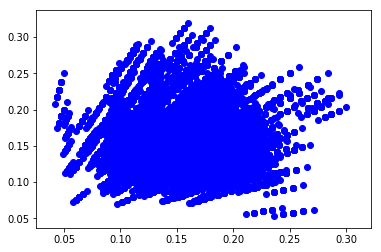

In [129]:
#plt.figure(figsize=(64,36))
plt.scatter(grass_sample['attack']/grass_sample['stat_total'], grass_sample['defense']/grass_sample['stat_total'], c='b')
plt.scatter(fire_sample['attack']/fire_sample['stat_total'], fire_sample['defense']/fire_sample['stat_total'], c='b')
plt.scatter(water_sample['attack']/water_sample['stat_total'], water_sample['defense']/water_sample['stat_total'], c='b')
plt.show()

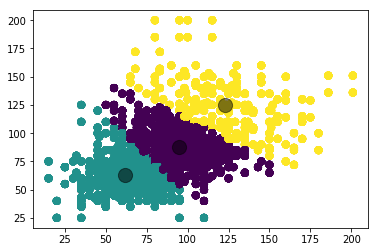

In [ ]:
##Usando kmeans:

test = pd.concat([water_sample, fire_sample, grass_sample])
group= np.empty([len(test), 2])

i=0
for index, pokemon in test.iterrows():
    
    #group[i]=np.array( [pokemon['attack']/pokemon['stat_total'], pokemon['defense']/pokemon['stat_total']])
    group[i]=np.array( [pokemon['attack'], pokemon['defense']])
    i+=1
    
kmeans = KMeans(n_clusters=3)    
#kmeans.fit(group)
y_kmeans = kmeans.fit_predict(group)

plt.scatter(group[:, 0], group[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
## Usando Spectral Clustering:

test = pd.concat([water_sample, fire_sample, grass_sample])
group= np.empty([len(test), 2])

i=0
for index, pokemon in test.iterrows():
    
    group[i]=np.array( [pokemon['attack']/pokemon['stat_total'], pokemon['defense']/pokemon['stat_total']])
    #group[i]=np.array( [pokemon['attack'], pokemon['defense']])
    i+=1
    
spectral = SpectralClustering(n_clusters=3)    
spectral.fit(group)
y_spectral = spectral.fit_predict(group)

plt.scatter(group[:, 0], group[:, 1], c=y_spectral, s=50, cmap='viridis')

In [ ]:
## Usando  Agglomerative Clustering:

test = pd.concat([water_sample, fire_sample, grass_sample])
group= np.empty([len(test), 2])

i=0
for index, pokemon in test.iterrows():
    
    #group[i]=np.array( [pokemon['attack']/pokemon['stat_total'], pokemon['defense']/pokemon['stat_total']])
    group[i]=np.array( [pokemon['attack'], pokemon['defense']])
    i+=1
    
agglo = AgglomerativeClustering(n_clusters=3)    
agglo.fit(group)
y_agglo = agglo.fit_predict(group)

plt.scatter(group[:, 0], group[:, 1], c=y_agglo, s=50, cmap='viridis')

In [ ]:
##Usando DBSCAN

test = pd.concat([water_sample, fire_sample, grass_sample])
group= np.empty([len(test), 2])

i=0
for index, pokemon in test.iterrows():
    
    group[i]=np.array( [pokemon['attack']/pokemon['stat_total'], pokemon['defense']/pokemon['stat_total']])
    #group[i]=np.array( [pokemon['attack'], pokemon['defense']])
    i+=1
    
dbscan = DBSCAN() 
dbscan.fit(group)
y_dbscan = dbscan.fit_predict(group)

plt.scatter(group[:, 0], group[:, 1], c=y_dbscan, s=50, cmap='viridis')